In [1]:
#import the neccesary libraries
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '264d3fa0-f309-449e-8f6a-56e67e0b9ea9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-02-06T09:40:01.567Z', 'error_code': 0, 'error_message': None, 'elapsed': 19, 'credit_count': 1, 'notice': None, 'total_count': 8840}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10814, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
df=pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')

#adding a time stamp to the columns to know the time each data was 

In [4]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10814,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.961977e+07,1.961977e+07,False,NaN,1,NaN,NaN,None,2024-02-06T09:39:00.000Z,42941.958914,1.785097e+10,16.6293,-0.006330,0.033028,-1.003141,-2.343742,-0.659114,21.622165,8.425113e+11,51.1482,9.017811e+11,None,2024-02-06T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 10:40:17.227361
1,1027,Ethereum,ETH,ethereum,8380,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201836e+08,1.201836e+08,True,NaN,2,NaN,NaN,None,2024-02-06T09:39:00.000Z,2328.013925,7.604486e+09,19.8519,0.007364,0.589864,0.969420,4.155713,-1.081514,23.727313,2.797892e+11,16.9858,2.797892e+11,None,2024-02-06T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 10:40:17.227361
2,825,Tether USDt,USDT,tether,74159,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.623650e+10,9.960077e+10,True,NaN,3,NaN,NaN,None,2024-02-06T09:38:00.000Z,0.999019,2.975665e+10,18.0125,0.020803,0.009577,-0.084546,-0.156606,-0.122746,-0.133952,9.614208e+10,5.8367,9.950305e+10,None,2024-02-06T09:38:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-06 10:40:17.227361
3,1839,BNB,BNB,bnb,2053,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495462e+08,1.495462e+08,False,NaN,4,NaN,NaN,None,2024-02-06T09:38:00.000Z,302.857041,7.044638e+08,-24.9243,0.307451,-0.372050,-2.501575,-1.306367,29.196626,23.116123,4.529112e+10,2.7496,4.529112e+10,None,2024-02-06T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 10:40:17.227361
4,5426,Solana,SOL,solana,625,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.362073e+08,5.688777e+08,True,NaN,5,NaN,NaN,None,2024-02-06T09:39:00.000Z,95.776732,1.384838e+09,-5.9629,-0.103424,-1.337786,-7.334326,2.648480,34.296048,121.112873,4.177851e+10,2.5363,5.448525e+10,None,2024-02-06T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 10:40:17.227361
5,52,XRP,XRP,xrp,1226,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.443619e+10,9.998794e+10,False,NaN,6,NaN,NaN,None,2024-02-06T09:39:00.000Z,0.502843,7.785893e+08,23.5444,0.063880,0.068906,-5.527044,-11.243842,-21.946705,-25.994949,2.737284e+10,1.6618,5.028426e+10,None,2024-02-06T09:39:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 10:40:17.227361
6,3408,USDC,USDC,usd-coin,16594,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.703497e+10,2.703497e+10,False,NaN,7,NaN,NaN,None,2024-02-06T09:39:00.000Z,1.000141,4.283874e+09,27.8609,0.015879,0.002525,0.002841,0.013002,0.011337,0.011787,2.703878e+10,1.6415,2.703878e+10,None,2024-02-06T09:39:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-06 10:40:17.227361
7,2010,Cardano,ADA,cardano,1066,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.543268e+10,3.659974e+10,False,NaN,8,NaN,NaN,None,2024-02-06T09:38:00.000Z,0.495182,2.691321e+08,10.0286,0.138288,-1.022728,-6.166920,-4.668280,0.437366,39.310644,1.754563e+10,1.0652,2.228320e+10,None,2024-02-06T09:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-06 10:40:17.227361
8,5805,Avalanche,AVAX,avalanche,660,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.20

In [5]:
#function to automate the pulling of crypto data
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '264d3fa0-f309-449e-8f6a-56e67e0b9ea9',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print()
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print()
    
    df=pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df 
    
    if not os.path.isfile(r'C:\Users\User\Documents\Python Scripts\API.CSV'):
        df.to_csv(r'C:\Users\User\Documents\Python Scripts\API.CSV', header= 'column_names')
    else:
        df.to_csv(r'C:\Users\User\Documents\Python Scripts\API.CSV', mode= 'a' ,header= 'False')

In [6]:
import os
from time import time
from time import sleep

for i in  range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()


API Runner completed

API Runner completed

API Runner completed

API Runner completed


KeyboardInterrupt: 

In [7]:
df72= pd.read_csv(r'C:\Users\User\Documents\Python Scripts\API.CSV')
df72.head(4)

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0.0,1,Bitcoin,BTC,bitcoin,10799,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19613106.0,19613106.0,False,NaN,1,NaN,NaN,NaN,2024-01-30T11:27:00.000Z,43472.78681607815,22787934611.75666,53.4464,0.23190263,2.82740291,11.79852535,2.09689198,12.54214787,26.46719769,852636375939.1433,51.1263,912928523137.64,NaN,2024-01-30T11:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-30 12:28:36.977229
1,1.0,1027,Ethereum,ETH,ethereum,8341,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120183304.18119937,120183304.18119937,True,NaN,2,NaN,NaN,NaN,2024-01-30T11:27:00.000Z,2314.271188246964,9235010026.20401,36.3984,0.22244209,1.8635384,3.91743112,0.05975689,10.59391595,28.89994852,278136758174.8706,16.6778,278136758174.87,NaN,2024-01-30T11:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-30 12:28:36.977229
2,2.0,825,Tether USDt,USDT,tether,73349,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,96052972269.41206,99600769238.07242,True,NaN,3,NaN,NaN,NaN,2024-01-30T11:26:00.000Z,0.9998650661943286,38893718254.372444,41.4334,0.01256952,-0.0024145,0.06094464,0.01141576,-0.03338613,-0.03444708,96040011476.3177,5.7571,99587329727.23,NaN,2024-01-30T11:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-30 12:28:36.977229
3,3.0,1839,BNB,BNB,bnb,2040,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149547249.77387816,149547249.77387816,False,NaN,4,NaN,NaN,NaN,2024-01-30T11:26:00.000Z,310.13784371710955,815134506.8315399,6.0093,-0.2173237,0.52735122,4.65832746,-2.59665146,35.46500628,38.62675493,46380261578.69457,2.7801,46380261578.69,NaN,2024-01-30T11:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-30 12:28:36.977229


In [8]:
pd.set_option ('display.float_format',lambda x: '%.5f'% x)
pd.set_option('display.max_columns', None)

#print everything 

In [9]:
print(df)
#have a view of the dataFrame

       id         name symbol          slug  num_market_pairs  \
0       1      Bitcoin    BTC       bitcoin             10814   
1    1027     Ethereum    ETH      ethereum              8380   
2     825  Tether USDt   USDT        tether             74159   
3    1839          BNB    BNB           bnb              2053   
4    5426       Solana    SOL        solana               625   
5      52          XRP    XRP           xrp              1226   
6    3408         USDC   USDC      usd-coin             16594   
7    2010      Cardano    ADA       cardano              1066   
8    5805    Avalanche   AVAX     avalanche               660   
9    1975    Chainlink   LINK     chainlink              1616   
10     74     Dogecoin   DOGE      dogecoin               888   
11   1958         TRON    TRX          tron               926   
12   6636     Polkadot    DOT  polkadot-new               682   
13   3890      Polygon  MATIC       polygon              1270   
14  11419      Toncoin   

In [10]:
df3=df.groupby('name',sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.21440,-0.00935,-1.09605,-2.39540,-0.70272,21.53022
Ethereum,-0.08053,0.61720,0.95099,4.14724,-1.08424,23.71842
Tether USDt,0.02793,-0.00319,-0.08087,-0.16016,-0.12376,-0.13403
BNB,0.23171,-0.32962,-2.53502,-1.41255,29.21358,23.05622
Solana,-0.15876,-1.26977,-7.40738,2.80181,34.50374,121.21723
XRP,-0.07239,0.03279,-5.58368,-11.31302,-21.91531,-26.05532
USDC,0.00844,0.00137,0.00386,0.01586,0.01484,0.01328
Cardano,0.11276,-0.95516,-6.13609,-4.60022,0.30940,39.46278
Avalanche,-0.70789,-3.31216,-6.67953,-1.08808,25.52189,166.67985


In [12]:
df4= df3.stack()

print(df4)

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.21440
         quote.USD.percent_change_24h    -0.00935
         quote.USD.percent_change_7d     -1.09605
         quote.USD.percent_change_30d    -2.39540
         quote.USD.percent_change_60d    -0.70272
                                           ...   
Toncoin  quote.USD.percent_change_24h     0.11407
         quote.USD.percent_change_7d     -2.97133
         quote.USD.percent_change_30d    -6.37432
         quote.USD.percent_change_60d   -10.34059
         quote.USD.percent_change_90d   -22.92934
Length: 90, dtype: float64


In [13]:
df5=df4.to_frame(name = 'values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.21440
        quote.USD.percent_change_24h  -0.00935
        quote.USD.percent_change_7d   -1.09605
        quote.USD.percent_change_30d  -2.39540
        quote.USD.percent_change_60d  -0.70272
...                                        ...
Toncoin quote.USD.percent_change_24h   0.11407
        quote.USD.percent_change_7d   -2.97133
        quote.USD.percent_change_30d  -6.37432
        quote.USD.percent_change_60d -10.34059
        quote.USD.percent_change_90d -22.92934

[90 rows x 1 columns]

In [15]:
index= pd.Index(range(90))

df6=df5.reset_index()
df6



,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.21440
1,Bitcoin,quote.USD.percent_change_24h,-0.00935
2,Bitcoin,quote.USD.percent_change_7d,-1.09605
3,Bitcoin,quote.USD.percent_change_30d,-2.39540
4,Bitcoin,quote.USD.percent_change_60d,-0.70272
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,0.11407
86,Toncoin,quote.USD.percent_change_7d,-2.97133
87,Toncoin,quote.USD.percent_change_30d,-6.37432
88,Toncoin,quote.USD.percent_change_60d,-10.34059


In [16]:
df7=df6.rename(columns={'level_1':'percent_change'})

In [17]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [18]:
df7['percent_change']= df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1hr', '24hrs','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1hr,-0.21440
1,Bitcoin,24hrs,-0.00935
2,Bitcoin,7d,-1.09605
3,Bitcoin,30d,-2.39540
4,Bitcoin,60d,-0.70272
...,...,...,...
85,Toncoin,24hrs,0.11407
86,Toncoin,7d,-2.97133
87,Toncoin,30d,-6.37432
88,Toncoin,60d,-10.34059


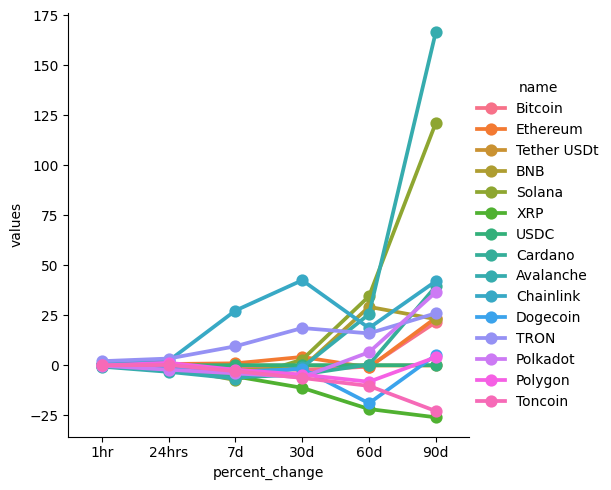

In [19]:
sns.catplot(x='percent_change', y = 'values',hue= 'name', data =df7, kind='point')

In [29]:
df30= df7[['name','percent_change','values']]
df30= df7.query("name=='Bitcoin'")
df30

,name,percent_change,values
0,Bitcoin,1hr,-0.21440
1,Bitcoin,24hrs,-0.00935
2,Bitcoin,7d,-1.09605
3,Bitcoin,30d,-2.39540
4,Bitcoin,60d,-0.70272
5,Bitcoin,90d,21.53022


<AxesSubplot:xlabel='percent_change', ylabel='values'>

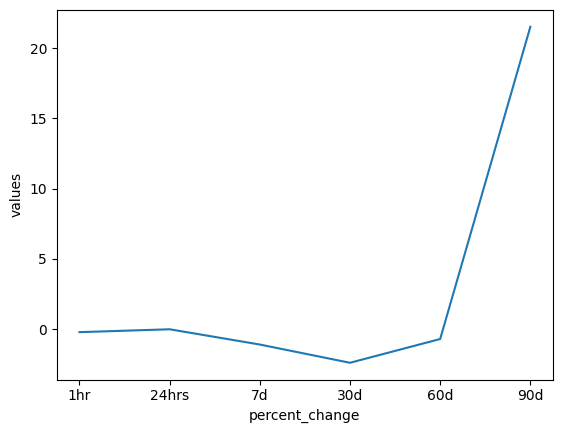

In [31]:
sns.lineplot(x='percent_change', y= 'values', data=df30)